In [3]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size =32

print('Loading data .....')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')

input_train = sequence.pad_sequences(input_train, maxlen = maxlen)
input_test = sequence.pad_sequences(input_test, maxlen = maxlen)

print('Input train shape', input_train.shape)
print('Input test shape', input_test.shape)

Loading data .....
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
Input train shape (25000, 500)
Input test shape (25000, 500)


In [4]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

C:\Python\anacoda3\lib\site-packages\tensorflow\python\ops\gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 20s 998us/step - loss: 0.6429 - acc: 0.6164 - val_loss: 0.4641 - val_acc: 0.8176
Epoch 2/10
20000/20000 [==============================] - 20s 975us/step - loss: 0.3944 - acc: 0.8356 - val_loss: 0.3758 - val_acc: 0.8448
Epoch 3/10
20000/20000 [==============================] - 20s 1ms/step - loss: 0.2867 - acc: 0.8862 - val_loss: 0.3527 - val_acc: 0.8670
Epoch 4/10
20000/20000 [==============================] - 20s 1ms/step - loss: 0.2091 - acc: 0.9204 - val_loss: 0.4259 - val_acc: 0.8326
Epoch 5/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.1457 - acc: 0.9477 - val_loss: 0.5787 - val_acc: 0.7452
Epoch 6/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.0980 - acc: 0.9675 - val_loss: 0.4674 - val_acc: 0.8208
Epoch 7/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.0651 - acc: 0.9790 - val_loss: 0.6508 - val_

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


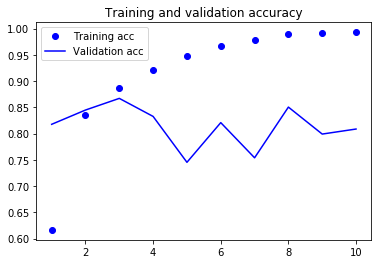

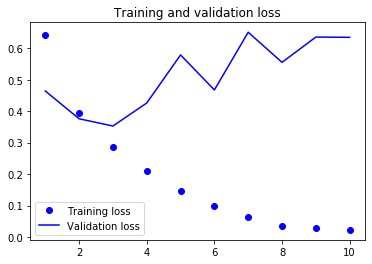

In [6]:
import matplotlib.pyplot as plt

print(history.history.keys())

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [7]:
## Reasons for poor performance in Validation accuracy
## 1. Full sequence is not presented to Simple RNN only 500 words
## 2. SimpleRNN is not a good choice at performing long sequences